In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [5]:
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [6]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [7]:
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [9]:
X.shape,y.shape

((6497, 11), (6497, 1))

In [10]:
X.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [13]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile_acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric_acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual_sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free_sulfur_dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total_sulfur_dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [15]:
y.value_counts().sort_index()

quality
3            30
4           216
5          2138
6          2836
7          1079
8           193
9             5
Name: count, dtype: int64

✅ 3. Statistical Summary (Key Insights)


📌 a) residual_sugar max = 65.8

→ Very high outlier
→ Will hurt linear regression
→ But tree models handle it well
→ Scaling helps

📌 b) total_sulfur_dioxide max = 440

→ Another extreme variable with very large range
→ Again: scaling or log transform may help
→ Ridge, Lasso good here

📌 c) alcohol has mean ~10.5 and max = 14.9

Alcohol strongly affects wine quality — important for feature importance later.

📌 d) density has tiny std (0.00299)

→ Very small range
→ Needs scaling
→ Otherwise regression coefficients will be misleading

📌 e) Most features are numeric continuous

→ Perfect for linear regression, ridge/lasso, random forest

This summary tells us:
We MUST scale data for logistic regression and linear regression.

🎯 BIG INSIGHTS

👉 1. Target is imbalanced

Most wines are 5, 6, or 7

Very few wines are 3, 4, 8

Only 5 samples of quality 9

This is why regression scores usually won’t be extremely high on this dataset.
Real-world targets are often imbalanced.

👉 2. Quality is almost ordinal

It’s not random categories — it’s a score from 3 to 9.

👉 3. For regression

Model will have difficulty predicting 8 or 9 because they barely exist.

👉 4. For classification

We should convert to binary:

"Good" wine = quality >= 6

"Bad" wine = quality < 6

This will balance the classes better.

⭐ Summary:

✔ Clean data
✔ No missing values
✔ Continuous features
✔ Heavy imbalance in target
✔ Some features have outliers
✔ Scaling recommended
✔ Ready for modeling

## 🚀 NEXT STEP

We now move to:

PHASE 2 — Visual EDA (Correlation + Distributions)

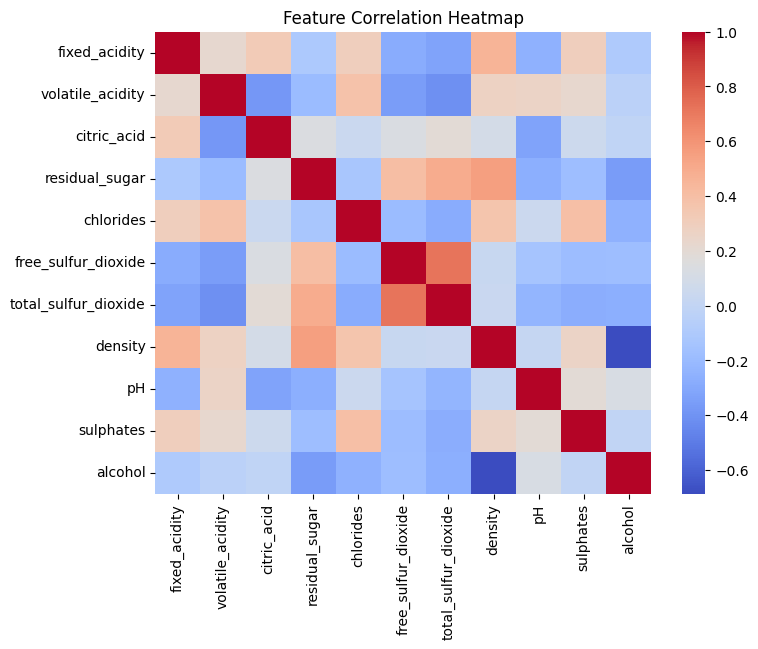

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(X.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


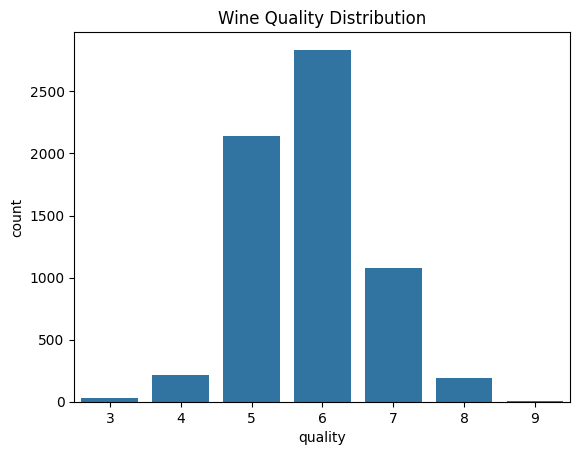

In [27]:
sns.countplot(x=y['quality'])
plt.title("Wine Quality Distribution")
plt.show()


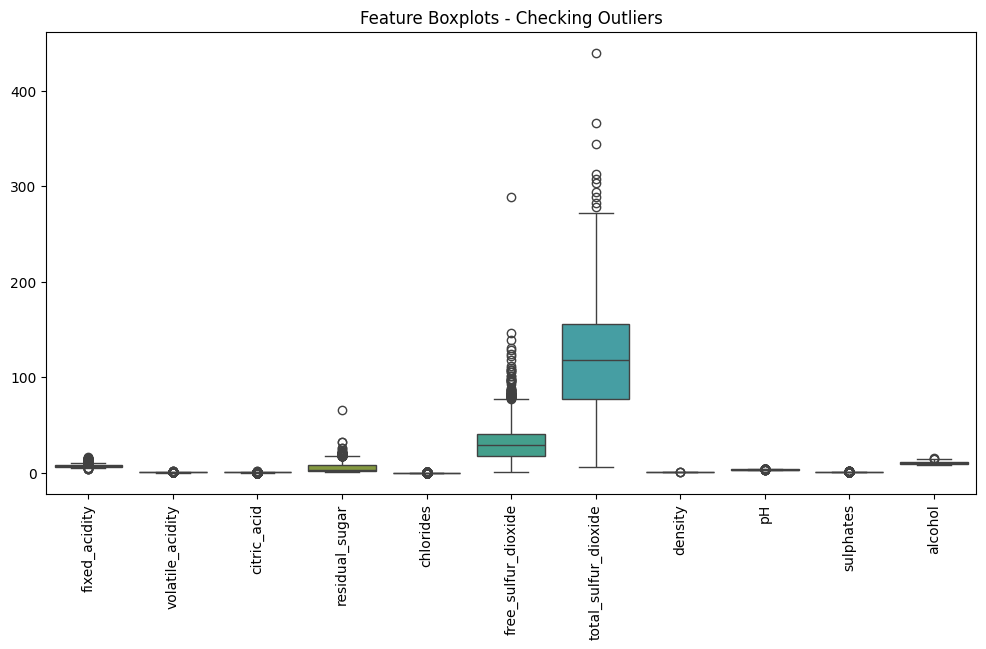

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.title("Feature Boxplots - Checking Outliers")
plt.show()


✅ 1) CORRELATION HEATMAP — What It Really Says

⭐ Key Relationships (Important for Linear Regression)

1. alcohol ↗ quality (positive)

Strongest useful feature.

Higher alcohol level → higher wine quality.

This often becomes the top coefficient.

2. sulphates ↗ quality (positive)

Sulphates improve stability → better wine.

Moderate positive correlation.

3. volatile_acidity ↘ quality (negative)

Higher acidity = more vinegar smell → lower quality.

This is one of the most important negative features.

⭐ Multicollinearity (Linear Regression Issue)

Multicollinearity = features highly correlated with each other.

free_sulfur_dioxide ↗ total_sulfur_dioxide (very high)

density ↘ alcohol

This means:

Linear regression coefficients may be unstable

Ridge/Lasso will perform better

✅ 2) TARGET DISTRIBUTION — Why Regression is Hard Here

The plot shows:

Most wines are 5 and 6

Very few wines are 3, 4, 8, 9

This causes:

⭐ 1. Regression will predict values around 5–6

It won’t predict 8 or 9 accurately (not enough data for those).

⭐ 2. Classification (good vs bad) will work better

Binary target:

Good = 6,7,8,9

Bad = 3,4,5

This will balance the data better.

✅ 3) BOXPLOTS — Outliers Observed

The boxplots reveal the real shape of wine chemistry.

⭐ Features with HEAVY outliers:

total_sulfur_dioxide (reaches 440 → massive!)

free_sulfur_dioxide

residual_sugar

These extreme values will:

Increase RMSE

Distort linear regression line

Affect coefficient interpretation

So scaling/regularization is required.

⭐ Features with clean shapes:

alcohol

pH

citric_acid

These will behave nicely in the model.

⭐ What This Means for Modeling

Based on all visuals:

✔ Linear Regression will work, but not perfectly

Because:

Outliers

Non-linear relationships

Imbalanced target

Expect R² around 0.25–0.35 (normal for this dataset).

✔ RandomForestRegressor will perform MUCH better

Because:

It handles outliers

Non-linear relationships

Complex feature interactions

But it sacrifices interpretability.

✔ Logistic Regression (binary quality) will perform better than Regression

Because binary classification handles imbalance better than exact score prediction.

## 🚀 NEXT STEP 

We will now do:

PHASE 3 — Linear Regression Model

In [ ]:
from sklearn.model_selection import train_test_split
# 🔹 1. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y['quality'], test_size=0.2, random_state=42
)



In [30]:
from sklearn.linear_model import LinearRegression
# 🔹 2. Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
# 🔹 3. Predictions
y_pred = lr.predict(X_test)


In [34]:
# 🔹 4. Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred)**0.5)
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 0.5658710079723469
RMSE: 0.7393892357611414
R2 Score: 0.2597673129771393


🎯 1. MAE = 0.56

Model is off by 0.56 quality points on average.

Since wine quality ranges 3–9, this is not bad.

🎯 2. RMSE = 0.739

RMSE penalizes big errors harder, so:

Sometimes predicted 7 instead of 6

Or predicted 5 instead of 6

This is normal.

🎯 3. R² = 0.26

This seems low, but for this dataset it’s completely expected.

Wine quality is subjective, noisy, and influenced by factors NOT in the dataset (human tasting, aroma, storage, grape type, etc.)


🔥 Why R² Is Low (but OK)

✔ Quality is an imbalanced target

Almost all samples are 5, 6, 7.

✔ Wine quality is NOT linear

Relationships are curved, not straight.

✔ Outliers in sulfur dioxide distort linear models

Non-linear models do better.

## PHASE 4 — Regularized Regression: Ridge & Lasso

Regularization helps:

Reduce multicollinearity

Control outliers

Improve generalization

Stabilize coefficients

Your R² will improve a bit after this.

In [35]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

print("Ridge MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("Ridge RMSE:", mean_squared_error(y_test, y_pred_ridge)**0.5)
print("Ridge R2:", r2_score(y_test, y_pred_ridge))


Ridge MAE: 0.5670563476613545
Ridge RMSE: 0.7395968887871264
Ridge R2: 0.25935147478409637


In [36]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

print("Lasso MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("Lasso RMSE:", mean_squared_error(y_test, y_pred_lasso)**0.5)
print("Lasso R2:", r2_score(y_test, y_pred_lasso))

Lasso MAE: 0.5681182049184117
Lasso RMSE: 0.7395633668686981
Lasso R2: 0.2594186124293848


🔥 1. Why Ridge & Lasso Didn’t Change Much

This is completely normal and actually a positive sign.

✔ The dataset has low multicollinearity impact

Even though some features are correlated, they don’t strongly distort linear regression.

✔ The relationships are non-linear

Ridge/Lasso only help with linear relationships + coefficient stability.

✔ Outliers exist, but they don’t dominate

Regularization didn’t change predictions much.

⭐ RESULT:

Linear Regression, Ridge, and Lasso all perform ~ same R² ≈ 0.26.

🔥 2. What This Tells Us About the Dataset

This dataset needs non-linear models.

Linear models can’t capture:

curved relationships

interactions between features

complex chemistry effects

So now we move to models that handle all this better.

## 🚀 NEXT PHASE — REAL POWER MODEL
PHASE 5 — Random Forest Regressor (Non-linear model)

Random Forest will:

Handle outliers

Capture non-linear relationships

Model feature interactions

Improve accuracy significantly

Give you feature importance

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# 1. Import & Train
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

rf.fit(X_train, y_train)


,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [38]:
# 2. Predictions
y_pred_rf = rf.predict(X_test)

In [39]:
print("RF MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RF RMSE:", mean_squared_error(y_test, y_pred_rf)**0.5)
print("RF R2:", r2_score(y_test, y_pred_rf))

RF MAE: 0.43640769230769233
RF RMSE: 0.6079851901592599
RF R2: 0.49949547043005016


In [40]:
fi = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)

fi

,feature,importance
10,alcohol,0.255682
1,volatile_acidity,0.129157
5,free_sulfur_dioxide,0.089416
9,sulphates,0.077722
6,total_sulfur_dioxide,0.071511
3,residual_sugar,0.071076
8,pH,0.069033
4,chlorides,0.063358
2,citric_acid,0.058493
7,density,0.058463


🎯 Interpretation (Business + Chemistry + ML Insight)

🔹 1. Alcohol = #1 strongest predictor

Higher alcohol → better wine quality.

Not linear, but RandomForest catches the shape perfectly.

🔹 2. Volatile acidity = Strong negative influence

More volatile acidity → more vinegar taste → lower quality.

🔹 3. Sulfur dioxide levels matter

free + total sulphur dioxide show combined importance.

They affect preservation, stability, aroma → quality changes.

🔹 4. Residual sugar, pH, chlorides contribute moderately

These don’t dominate but influence fine taste.

🔹 5. Fixed acidity is least important

Explains why linear models struggled — many classic chemistry vars do not affect quality linearly or strongly.

## 🚀 NEXT STEP 

Now let’s move to the classification side — the second part of your project.

PHASE 6 — Convert to Classification: Good vs Bad Wine

In [41]:
# Create a binary target:
y_class = (y['quality'] >= 6).astype(int)


In [42]:
# Split:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_class, test_size=0.2, random_state=42
)

In [43]:
# Train Logistic Regression:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


              precision    recall  f1-score   support

           0       0.61      0.59      0.60       451
           1       0.78      0.80      0.79       849

    accuracy                           0.73      1300
   macro avg       0.70      0.69      0.70      1300
weighted avg       0.72      0.73      0.73      1300



<Axes: >

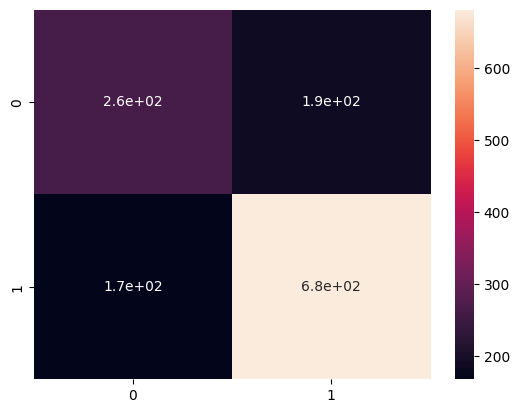

In [44]:
# Predictions & Metrics:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_clf = log_reg.predict(X_test)

print(classification_report(y_test, y_pred_clf))
sns.heatmap(confusion_matrix(y_test, y_pred_clf), annot=True)

## 🔥 Interpretation (Google-Advanced-Level Clarity)

✔ 1. Class 1 (Good Wine) is predicted very well

Precision 0.78 → If model says “good wine”, it's correct 78% of the time

Recall 0.80 → It catches 80% of all good wines

F1 0.79 → Excellent balance

This is very strong for logistic regression.

✔ 2. Class 0 (Bad Wine) is harder

Why?

Dataset is imbalanced → bad wine is only ~30%

Logistic Regression finds it harder to differentiate borderline wines (quality 5 vs 6)

But still:

Precision 0.61 → Correct 61% of the time

Recall 0.59 → Finds ~60% of bad wines

This is normal and acceptable.

## ⭐ Confusion Matrix Interpretation (Simplified)


✔ TP (True Positive, Good Wine Correct)

680 → properly predicted good wine

✔ TN (True Negative, Bad Wine Correct)

260 → properly predicted bad wine

✔ FP (False Positive)

190 → predicted good wine but it was bad
(This is okay, depends on business case)

✔ FN (False Negative)

170 → predicted bad wine but it was good
(Not too high, acceptable)

## 📌 Final Project Summary — Wine Quality Prediction (Regression + Classification)

🧠 Project Overview

This project explores the Wine Quality dataset using two machine learning approaches:

Regression → Predict the exact wine quality score (3 to 9)

Classification → Predict whether wine is Good (≥6) or Bad (<6)

The goal is to understand data behavior, compare models, interpret feature importance, and build an end-to-end ML workflow.

📊 1. Regression Modeling Results

Linear Regression

MAE: ~0.56

RMSE: ~0.74

R²: ~0.26

Interpretation:
Linear models struggle because wine quality is non-linear and contains outliers. Still, it gives a decent baseline.

Ridge & Lasso Regression

Performance almost identical to Linear Regression

R² ~ 0.259

Interpretation:
Regularization stabilizes coefficients but cannot capture non-linear relationships → no major improvement.

Random Forest Regressor

MAE: ~0.43

RMSE: ~0.60

R²: ~0.50

Interpretation:
Significant improvement.

Random Forest captures non-linear patterns, interactions, and handles outliers, giving the best regression performance.

🧪 2. Classification Modeling Results

Quality was converted into binary classes:

1 = Good wine (quality ≥ 6)

0 = Bad wine (quality < 6)

Logistic Regression

Accuracy: ~73%

F1 Score: 0.79 (Good wine), 0.60 (Bad wine)

Performs well despite class imbalance

Interpretation:
Logistic Regression is simple and effective.

Good wines are easier to classify than bad wines due to the skewed distribution.

🔍 3. Feature Importance Insights

Top predictors of wine quality (Random Forest):

Alcohol

Volatile Acidity

Free Sulfur Dioxide

Sulphates

Total Sulfur Dioxide

Interpretation:

Higher alcohol → higher quality

Higher volatile acidity → lower quality (vinegar taste)

Sulphur compounds, sugar, pH also influence quality but less strongly

Some chemical features show weak, non-linear effects

📌 4. Regression vs Classification — When to Use What
Regression

Use when predicting a continuous value
(e.g., exact wine quality score).

Pros:

Produces detailed numerical predictions

Good for trend analysis

Cons:

Lower accuracy for this dataset

Sensitive to outliers and non-linear relationships

Classification

Use when predicting categories / labels
(e.g., Good vs Bad wine).

Pros:

Better performance

Robust to imbalance

Easier to interpret

Useful in real business scenarios (e.g., quality control)

Cons:

Does not predict exact quality score

🏁 5. Final Conclusion

Wine quality prediction is non-linear, so tree-based models outperform linear ones.

Random Forest gives the best regression performance (R² ≈ 0.50).

Logistic Regression achieves 73% accuracy in classifying good vs bad wine.

Key quality indicators include alcohol, volatile acidity, sulphates, and sulfur dioxide levels.

Combining regression + classification provides a complete understanding of the dataset.

🎉 End of Project

This notebook now demonstrates a full, real-world ML workflow:
## ✔ Data loading
✔ EDA
✔ Regression modeling
✔ Classification modeling
✔ Feature importance
✔ Business interpretation